In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import pandas as pd

url = "https://drive.google.com/uc?id=16DeG8mBHOMjYZYsuoc1r_7ivwMZf6mOA"
df = pd.read_csv(url)


In [40]:
df.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


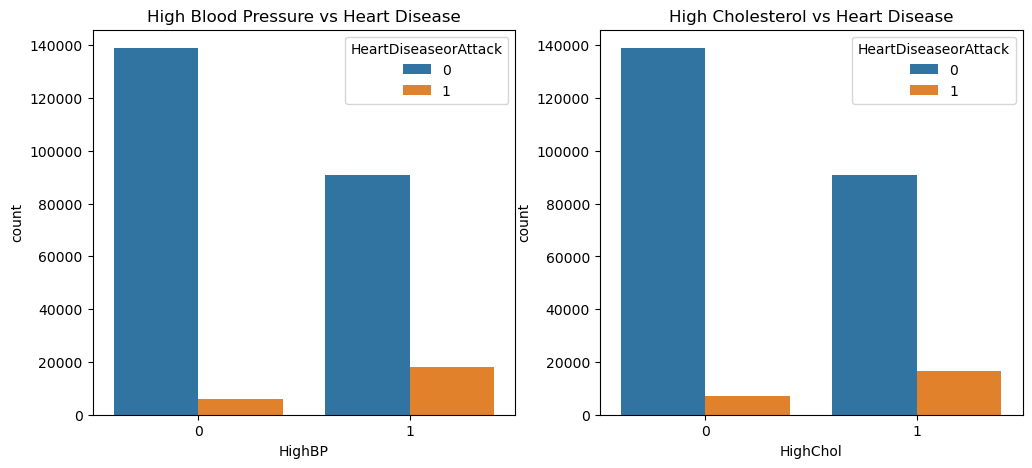

In [44]:
# Countplots for categorical variables (HighBP, HighChol)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x="HighBP", hue="HeartDiseaseorAttack", ax=axes[0])
axes[0].set_title("High Blood Pressure vs Heart Disease")

sns.countplot(data=df, x="HighChol", hue="HeartDiseaseorAttack", ax=axes[1])
axes[1].set_title("High Cholesterol vs Heart Disease")

plt.show()

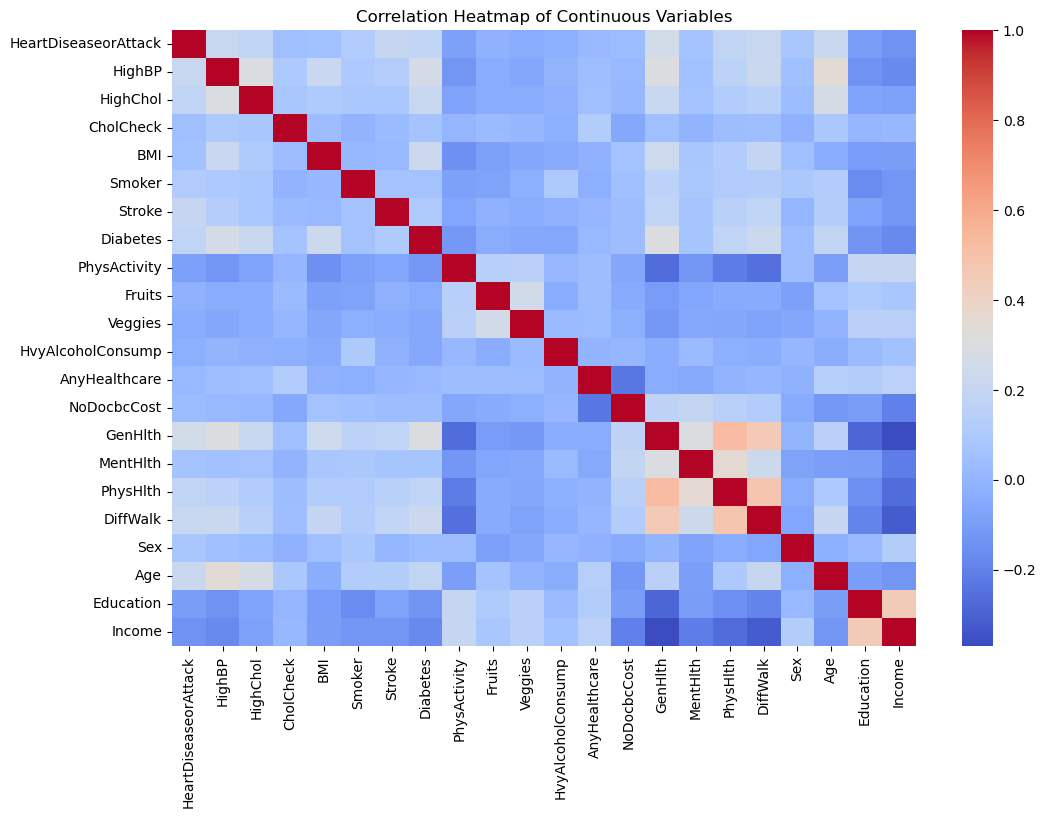

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


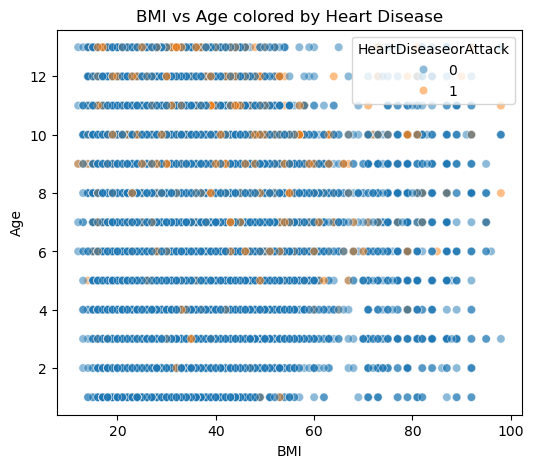

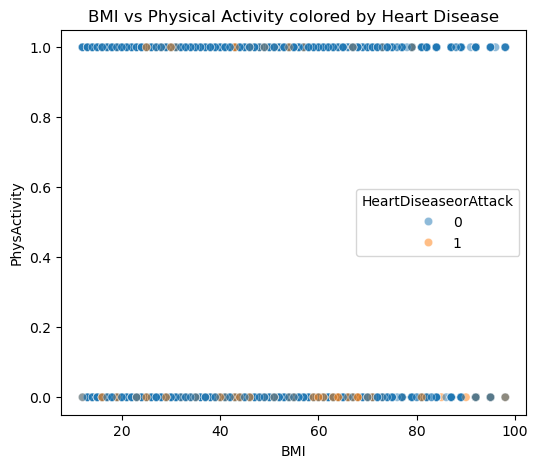

In [56]:
#  Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)   # only numeric columns
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


# BMI vs Age (if dataset has Age column)
if "Age" in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x="BMI", y="Age", hue="HeartDiseaseorAttack", alpha=0.5)
    plt.title("BMI vs Age colored by Heart Disease")
    plt.show()

# BMI vs PhysActivity (if available)
if "PhysActivity" in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x="BMI", y="PhysActivity", hue="HeartDiseaseorAttack", alpha=0.5)
    plt.title("BMI vs Physical Activity colored by Heart Disease")
    plt.show()


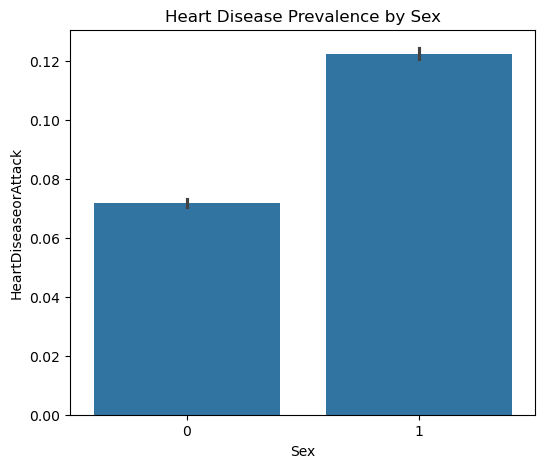

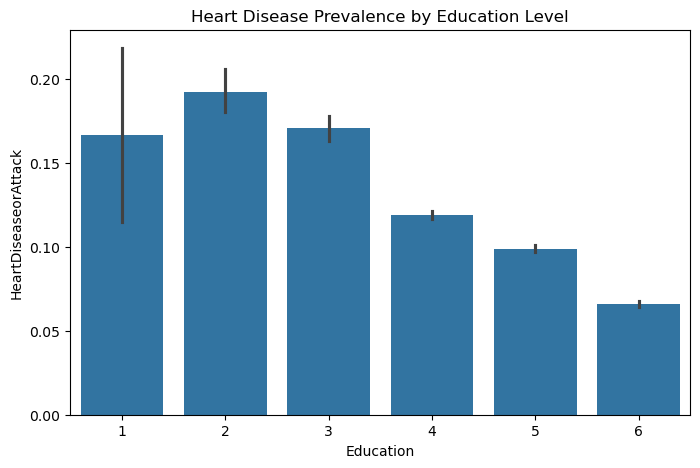

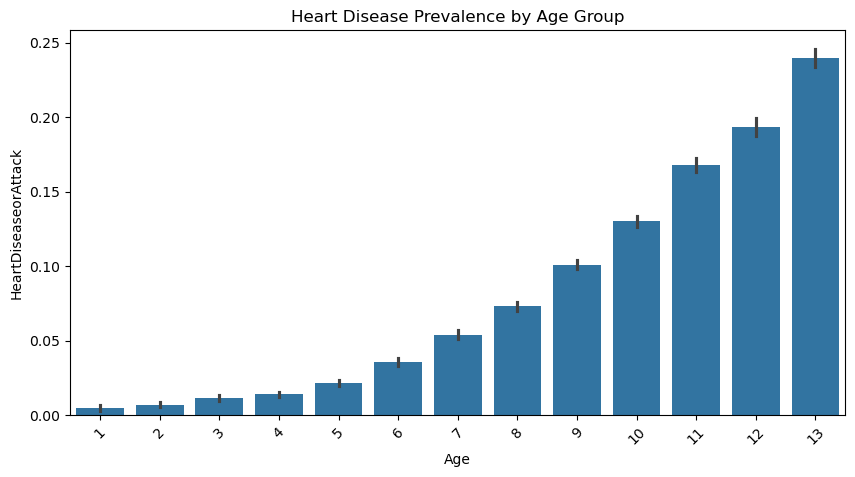

                   HeartDiseaseorAttack
Sex Education Age                      
0   1         1                     0.0
              2                     0.0
              3                     0.0
              4                     0.0
              5                     0.0


In [57]:

# Heart disease by Sex
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x="Sex", y="HeartDiseaseorAttack")
plt.title("Heart Disease Prevalence by Sex")
plt.show()

# Heart disease by Education
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Education", y="HeartDiseaseorAttack")
plt.title("Heart Disease Prevalence by Education Level")
plt.show()

# Heart disease by Age category
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Age", y="HeartDiseaseorAttack")
plt.title("Heart Disease Prevalence by Age Group")
plt.xticks(rotation=45)
plt.show()

# Alternatively: Pivot table summary
demo_summary = df.pivot_table(
    index=["Sex", "Education", "Age"],
    values="HeartDiseaseorAttack",
    aggfunc="mean"
)
print(demo_summary.head())
